In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import sys

In [8]:
sys.path.append('/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/bayesian')

In [10]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [ ]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random, generate_binary_coef_simple
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
random_seed = 1001

In [7]:
np.random.seed(random_seed)

In [8]:
data = np.load('train_data_experiment_2D.npy')

In [9]:
dg = DataGenerator()

In [10]:
n_samples = 10000

In [11]:
np.random.shuffle(data)
data = data[:n_samples]

In [17]:
X, names, complexity = dg(data[:,:-1], descriptions=['u','u_x','u_y','u_xx','u_xy','u_yy'],term_order_max=[4,2,2,1,1,1] )

In [18]:
len(names)

115

In [21]:
X.shape

(10000, 115)

In [22]:
names

[1,
 u,
 u_x,
 u_y,
 u_xx,
 u_xy,
 u_yy,
 u**2,
 u*u_x,
 u*u_y,
 u*u_xx,
 u*u_xy,
 u*u_yy,
 u_x**2,
 u_x*u_y,
 u_x*u_xx,
 u_x*u_xy,
 u_x*u_yy,
 u_y**2,
 u_xx*u_y,
 u_xy*u_y,
 u_y*u_yy,
 u_xx*u_xy,
 u_xx*u_yy,
 u_xy*u_yy,
 u**3,
 u**2*u_x,
 u**2*u_y,
 u**2*u_xx,
 u**2*u_xy,
 u**2*u_yy,
 u*u_x**2,
 u*u_x*u_y,
 u*u_x*u_xx,
 u*u_x*u_xy,
 u*u_x*u_yy,
 u*u_y**2,
 u*u_xx*u_y,
 u*u_xy*u_y,
 u*u_y*u_yy,
 u*u_xx*u_xy,
 u*u_xx*u_yy,
 u*u_xy*u_yy,
 u_x**2*u_y,
 u_x**2*u_xx,
 u_x**2*u_xy,
 u_x**2*u_yy,
 u_x*u_y**2,
 u_x*u_xx*u_y,
 u_x*u_xy*u_y,
 u_x*u_y*u_yy,
 u_x*u_xx*u_xy,
 u_x*u_xx*u_yy,
 u_x*u_xy*u_yy,
 u_xx*u_y**2,
 u_xy*u_y**2,
 u_y**2*u_yy,
 u_xx*u_xy*u_y,
 u_xx*u_y*u_yy,
 u_xy*u_y*u_yy,
 u_xx*u_xy*u_yy,
 u**4,
 u**3*u_x,
 u**3*u_y,
 u**3*u_xx,
 u**3*u_xy,
 u**3*u_yy,
 u**2*u_x**2,
 u**2*u_x*u_y,
 u**2*u_x*u_xx,
 u**2*u_x*u_xy,
 u**2*u_x*u_yy,
 u**2*u_y**2,
 u**2*u_xx*u_y,
 u**2*u_xy*u_y,
 u**2*u_y*u_yy,
 u**2*u_xx*u_xy,
 u**2*u_xx*u_yy,
 u**2*u_xy*u_yy,
 u*u_x**2*u_y,
 u*u_x**2*u_xx,
 u*u_x

In [23]:
Y = data[:,-1]
#Y = -0.9*X[:,0] + 10.*X[:,2] +1.9*X[:,3] -1.*X[:,9]

In [24]:
prior = ComplexityLogPrior(method='num_terms', simplicity_preference=0.1,complexity_terms=1.)

In [25]:
likelihood = GaussianLogLikelihood(X,Y,reg_normalization=False,random_state=random_seed)

In [26]:
posterior = LogPosterior(prior, likelihood)

In [27]:
import itertools

In [48]:
init_coefs1 = generate_binary_coef_random(len(names),40)

In [49]:
init_coefs2 = generate_binary_coef_simple(len(names),1)

In [54]:
init_coefs1

array([[0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [55]:
init_coefs = list(init_coefs1) + list(init_coefs2)

In [56]:
sequentialmc = SequentialMC(posterior=posterior,log_file='mc.csv')

In [57]:
for i, name in enumerate(names):
    print (i, name)

0 1
1 u
2 u_x
3 u_y
4 u_xx
5 u_xy
6 u_yy
7 u**2
8 u*u_x
9 u*u_y
10 u*u_xx
11 u*u_xy
12 u*u_yy
13 u_x**2
14 u_x*u_y
15 u_x*u_xx
16 u_x*u_xy
17 u_x*u_yy
18 u_y**2
19 u_xx*u_y
20 u_xy*u_y
21 u_y*u_yy
22 u_xx*u_xy
23 u_xx*u_yy
24 u_xy*u_yy
25 u**3
26 u**2*u_x
27 u**2*u_y
28 u**2*u_xx
29 u**2*u_xy
30 u**2*u_yy
31 u*u_x**2
32 u*u_x*u_y
33 u*u_x*u_xx
34 u*u_x*u_xy
35 u*u_x*u_yy
36 u*u_y**2
37 u*u_xx*u_y
38 u*u_xy*u_y
39 u*u_y*u_yy
40 u*u_xx*u_xy
41 u*u_xx*u_yy
42 u*u_xy*u_yy
43 u_x**2*u_y
44 u_x**2*u_xx
45 u_x**2*u_xy
46 u_x**2*u_yy
47 u_x*u_y**2
48 u_x*u_xx*u_y
49 u_x*u_xy*u_y
50 u_x*u_y*u_yy
51 u_x*u_xx*u_xy
52 u_x*u_xx*u_yy
53 u_x*u_xy*u_yy
54 u_xx*u_y**2
55 u_xy*u_y**2
56 u_y**2*u_yy
57 u_xx*u_xy*u_y
58 u_xx*u_y*u_yy
59 u_xy*u_y*u_yy
60 u_xx*u_xy*u_yy
61 u**4
62 u**3*u_x
63 u**3*u_y
64 u**3*u_xx
65 u**3*u_xy
66 u**3*u_yy
67 u**2*u_x**2
68 u**2*u_x*u_y
69 u**2*u_x*u_xx
70 u**2*u_x*u_xy
71 u**2*u_x*u_yy
72 u**2*u_y**2
73 u**2*u_xx*u_y
74 u**2*u_xy*u_y
75 u**2*u_y*u_yy
76 u**2*u_xx*u_xy
77 u

In [58]:
X.shape

(10000, 115)

In [59]:
from get_pareto import ParetoSet

In [60]:
sequentialmc.pareto_set = ParetoSet()

In [61]:
#init_coefs[0] = np.array([1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])

In [62]:
init_coefs

[array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0], dtype=int32),
 array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0

In [63]:
pareto_set = sequentialmc(samples=init_coefs,beta0_nsteps=100,beta0to1_nsteps=1000,beta1_nsteps=1000, mcmc_nsteps=10,feature_descriptions=names )

step: 0, beta:  0.000
step: 1, beta:  0.000
step: 2, beta:  0.000
step: 3, beta:  0.000
step: 4, beta:  0.000
step: 5, beta:  0.000
step: 6, beta:  0.000
step: 7, beta:  0.000
step: 8, beta:  0.000
step: 9, beta:  0.000
step: 10, beta:  0.000
step: 11, beta:  0.000
step: 12, beta:  0.000
step: 13, beta:  0.000
step: 14, beta:  0.000
step: 15, beta:  0.000
step: 16, beta:  0.000
step: 17, beta:  0.000
step: 18, beta:  0.000
step: 19, beta:  0.000
step: 20, beta:  0.000
step: 21, beta:  0.000
step: 22, beta:  0.000
step: 23, beta:  0.000
step: 24, beta:  0.000
step: 25, beta:  0.000
step: 26, beta:  0.000
step: 27, beta:  0.000
step: 28, beta:  0.000
step: 29, beta:  0.000
step: 30, beta:  0.000
step: 31, beta:  0.000
step: 32, beta:  0.000
step: 33, beta:  0.000
step: 34, beta:  0.000
step: 35, beta:  0.000
step: 36, beta:  0.000
step: 37, beta:  0.000
step: 38, beta:  0.000
step: 39, beta:  0.000
step: 40, beta:  0.000
step: 41, beta:  0.000
step: 42, beta:  0.000
step: 43, beta:  0.00

KeyboardInterrupt: 

In [64]:
pareto_set = sequentialmc.pareto_set

In [202]:
pareto_set.save_csv('pareto_set_experiment.csv')

In [75]:
list_likelihood = []
list_prior = []
for coef in init_coefs:
    list_likelihood.append(likelihood(coef))
    list_prior.append(prior(coef))

In [77]:
list_prior

[-7.0,
 -5.6000000000000005,
 -4.5,
 -5.2,
 -5.4,
 -5.7,
 -5.800000000000001,
 -5.7,
 -5.5,
 -5.800000000000001,
 -5.5,
 -5.9,
 -6.2,
 -6.0,
 -6.0,
 -6.5,
 -5.7,
 -6.800000000000001,
 -6.0,
 -6.1000000000000005,
 -5.0,
 -6.4,
 -5.9,
 -4.4,
 -6.7,
 -6.1000000000000005,
 -6.4,
 -5.6000000000000005,
 -5.6000000000000005,
 -5.0,
 -5.4,
 -6.1000000000000005,
 -5.800000000000001,
 -6.1000000000000005,
 -5.0,
 -6.5,
 -5.0,
 -5.9,
 -5.800000000000001,
 -5.1000000000000005,
 -0.0,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1

In [76]:
list_likelihood

[4.308922262491593,
 4.287404403831053,
 4.268929429338722,
 4.322177611115906,
 4.270686328539959,
 4.286824453962297,
 4.271663380978498,
 4.238448971615994,
 4.362796079248336,
 4.2439060785151765,
 4.2993429934707095,
 4.162090560269223,
 4.351213870204748,
 4.226662474013568,
 4.254384690966788,
 4.338342993981636,
 4.282918402536493,
 4.264822106166076,
 4.22939775041669,
 4.225571613446033,
 4.29005008331655,
 4.326381748986693,
 4.289134507835317,
 3.996844551314537,
 4.175443272731059,
 4.308009311149724,
 4.258282416982259,
 4.305066796918483,
 4.21167809151912,
 4.285509398808517,
 4.342080053054981,
 4.322520319783118,
 4.302969105550467,
 4.315252396904741,
 4.072015957651214,
 4.342539462536878,
 4.220918942570781,
 4.305326181248987,
 4.239670451189655,
 4.2009981687781215,
 3.372751866621067,
 3.401135822514044,
 3.395197891965667,
 3.845032062199977,
 3.379703371829519,
 3.366277780331143,
 3.3731145990872973,
 3.373786951617854,
 3.3817620899208403,
 3.713157332850942

In [65]:
pareto_set.to_array()

array([[0.00000000e+00, 2.06263751e-01],
       [1.00000000e+00, 8.03330899e-02],
       [6.00000000e+00, 6.94637512e-02],
       [7.00000000e+00, 5.67637592e-02],
       [8.00000000e+00, 5.47238692e-02],
       [9.00000000e+00, 5.14155662e-02],
       [1.00000000e+01, 3.98838370e-02],
       [1.10000000e+01, 3.85235696e-02],
       [1.50000000e+01, 3.68902301e-02],
       [1.60000000e+01, 3.67326284e-02],
       [2.00000000e+01, 3.57042231e-02],
       [2.10000000e+01, 3.50350090e-02],
       [2.40000000e+01, 3.36406514e-02],
       [2.60000000e+01, 3.35046728e-02],
       [2.70000000e+01, 3.30248015e-02],
       [2.90000000e+01, 3.24308405e-02],
       [3.20000000e+01, 3.09724980e-02],
       [3.40000000e+01, 3.04492947e-02],
       [3.60000000e+01, 3.01687413e-02],
       [3.70000000e+01, 2.98238619e-02],
       [3.90000000e+01, 2.94904679e-02],
       [4.00000000e+01, 2.88613152e-02],
       [4.30000000e+01, 2.84929967e-02],
       [5.10000000e+01, 2.81166741e-02]])

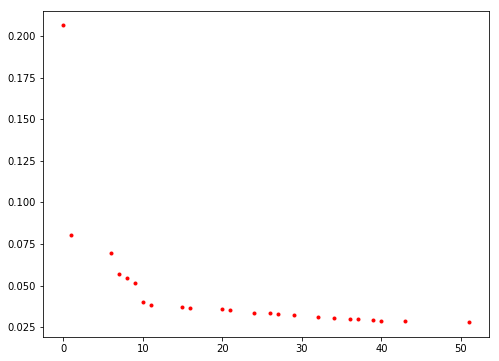

In [66]:
pareto_set.plot()

In [67]:
pareto_set[0].data

0

In [68]:
pareto_set[1].data

-0.393457406242303*u_x

In [69]:
pareto_set[2].data

2.10105600254905*u**2*u_y**2 - 8.51659938865403*u*u_x**2 - 24.3786720551678*u*u_x*u_y**2 + 4.41556884736677*u_x*u_xy - 281.215849354694*u_xy*u_y*u_yy - 0.20230723198406*u_y

In [70]:
pareto_set[3].data

-4.86797539699182*u**2*u_x**2 - 9.44226948232574*u**2*u_x*u_xx - 428.400119714602*u*u_x*u_xx*u_xy - 7.04076023576738*u_x*u_y**2*u_yy - 1.79156780786813*u_x*u_y - 0.330974299528065*u_x - 1.78253723579369*u_xy*u_y

In [71]:
pareto_set[4].data

1.81225844470436*u**2*u_x + 45.306832011083*u*u_x*u_y**2 - 2.07573455541889*u*u_x - 9.49604358240123*u_x*u_xx*u_y + 128.106485010061*u_x*u_y**2*u_yy + 106.614786460043*u_xx*u_y*u_yy - 4.63207212730818*u_xy*u_y**2 + 63.4000951447518*u_xy*u_y*u_yy

In [45]:
pareto_set[5].data

0.235449472498573*u**4 + 2.4171836269041*u**3*u_x + 0.575363965936285*u**3*u_y - 0.235497728380866*u**3 + 29.9083374135614*u**2*u_x**2 + 21.6472916109218*u**2*u_x*u_y - 2.72868674815052*u**2*u_x + 234.835318554332*u**2*u_xx*u_xy + 360.64273435018*u**2*u_xx*u_yy - 38.4782325995424*u**2*u_xy*u_y + 291.900525013994*u*u_x**2*u_xy - 3.4768401700483*u*u_x**2 - 841.336154404055*u*u_x*u_xx*u_xy - 352.763291666665*u*u_x*u_xx*u_y - 151.526281968511*u*u_x*u_xy*u_y + 599.937572232917*u*u_x*u_xy*u_yy + 12.9170307030456*u*u_x*u_xy - 9.48984882234227*u*u_x*u_y - 317.032260864084*u*u_xx*u_y**2 - 260.237051622927*u*u_xx*u_yy - 814.092290805955*u*u_xy*u_y*u_yy + 2.49578094518597*u*u_y**2 - 0.687583489642301*u*u_y + 824.233552434786*u_x**2*u_xx*u_y + 259.278510172292*u_x**2*u_xx + 622.097325043225*u_x**2*u_xy*u_y + 520.328604830804*u_x**2*u_xy*u_yy - 108.772408726816*u_x**2*u_xy - 26.0396264282502*u_x**2*u_yy - 23447.2542903187*u_x*u_xx*u_xy*u_y - 1084.234743602*u_x*u_xx*u_xy - 9578.98239848293*u_x*u_xx*

In [48]:
pareto_set[6].data

0.0901860019100376*u**4 - 24.3247258570959*u**2*u_x**2 + 6.62937699316447*u**2*u_x*u_y - 0.0252679328254466*u**2*u_x - 23.1370453603914*u**2*u_xx*u_yy - 90.6119396237893*u**2*u_y*u_yy + 0.657792300219331*u**2*u_yy - 3155.73916524891*u*u_x**2*u_xx + 200.064530766543*u*u_x**2*u_y + 44.0050061600291*u*u_x**2 + 36.4344448953432*u*u_x*u_xx + 82.1169980170037*u*u_x*u_y**2 + 4808.5122774839*u*u_xx**2*u_yy - 10944.4352537*u*u_xx*u_xy*u_yy - 18.8538879988588*u*u_xx*u_y**2 + 132.423553424089*u*u_xx*u_yy + 125.641804337477*u*u_y**3 + 1.89541221220548*u*u_y**2 + 99.6379173701263*u*u_y*u_yy - 0.157568552510729*u*u_y - 844.846949045665*u*u_yy**3 + 8.79134907499943*u*u_yy**2 - 0.0902568825157225*u + 326.031653019188*u_x**4 - 30590.320320502*u_x**2*u_xx**2 - 6385.52426030288*u_x**2*u_xx*u_yy + 1757.81554426504*u_x**2*u_xx - 14657.4358100058*u_x**2*u_xy**2 - 41.3720233799076*u_x**2*u_xy - 43.7282141452836*u_x**2*u_y + 5088.48187039437*u_x**2*u_yy**2 - 20.3075845557056*u_x**2 - 61440.0796955928*u_x*u_xx

In [49]:
pareto_set[7].data

0.122737896782922*u**3 + 33.3559611158499*u**2*u_x**2 - 0.660005724036864*u**2*u_x + 209.83409966885*u**2*u_xx*u_xy + 12.8912352117602*u**2*u_xx*u_yy + 166.848042005496*u**2*u_xy**2 - 2.05070467675478*u**2*u_xy*u_yy - 2.6167432237754*u**2*u_y*u_yy + 419.347173251959*u*u_x**2*u_xx + 349.835700181345*u*u_x**2*u_y + 65.0666248130033*u*u_x*u_y**2 + 5223.06952791071*u*u_xx**3 - 2408.70018668974*u*u_xx**2*u_yy + 60.88795798099*u*u_xx**2 + 1046.8626069782*u*u_xx*u_xy*u_yy - 265.573642450875*u*u_xx*u_y**2 + 261.714507787058*u*u_xx*u_y*u_yy - 42.2563685477916*u*u_xx*u_y + 2881.80219769356*u*u_xy**2*u_y + 87.4598623858604*u*u_xy*u_yy + 19.8602909553094*u*u_y**3 + 10.7157569733496*u*u_y**2*u_yy + 11.6616355944671*u*u_y*u_yy + 108.976675359537*u*u_yy**3 + 55.9434491275646*u*u_yy**2 + 0.740906175966189*u*u_yy - 0.12278393320868*u - 7859.27717017721*u_x**3*u_xx - 13012.0799047984*u_x**2*u_xx*u_xy + 1000.87925829507*u_x**2*u_xx - 21265.8605401769*u_x**2*u_xy**2 - 124.513134371864*u_x**2*u_y - 5.05152